In [190]:
# Inserting the data into the lab
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_2689622d3bb44c6295e7bc1d0783dde4(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_27f432c403a506fc9b89694a383d87f4282a96de','domain': {'id': 'ce9588cdb66f4bc8889c950585780ce9'},
            'password': 'l^R6K]-EMg&56c[/'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_train = pd.read_csv(get_object_storage_file_with_credentials_2689622d3bb44c6295e7bc1d0783dde4('DefaultProjectnchellaminibmcom', 'House Price Train.csv'))
df_train.head()
df_test = pd.read_csv(get_object_storage_file_with_credentials_2689622d3bb44c6295e7bc1d0783dde4('DefaultProjectnchellaminibmcom', 'House Price Test.csv'))
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [191]:
# Training data has 81 columns 43 objects,35 int & 3 floats
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [192]:
df_train.shape

(1460, 81)

In [193]:
# Test data doesnt contain teh Sale price column
df_test.shape
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [194]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [195]:
# identifying the list of columns with null values
null_columns=df_train.columns[df_train.isnull().any()]
print(null_columns)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [196]:
# we have 19 features with missing values 
df_train[null_columns].isnull().sum().sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [197]:
((df_train[null_columns].isnull().sum()/len(df_train))*100).sort_values()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [198]:
df_train[null_columns].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [199]:
cor=df_train.corr()

cor.sort_values(['SalePrice'], ascending=False,inplace=True)

print(cor.SalePrice)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

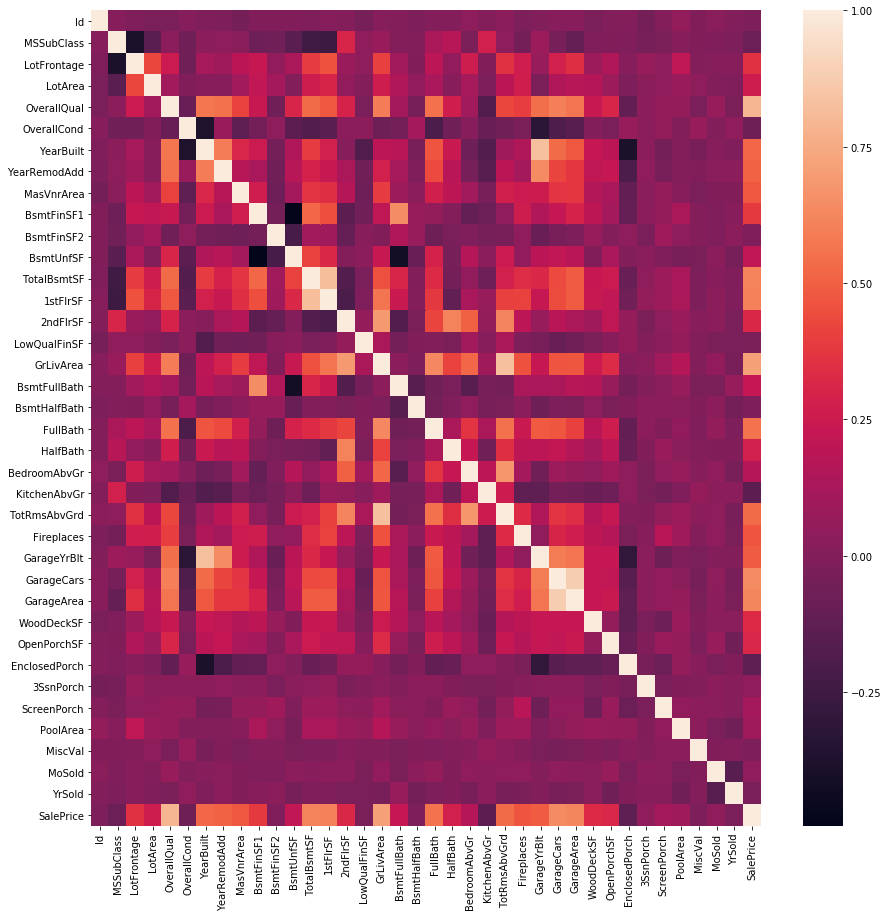

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df_train.corr())

In [201]:
df_train[df_train['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [202]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [203]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna('None')

In [204]:
df_train[df_train['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


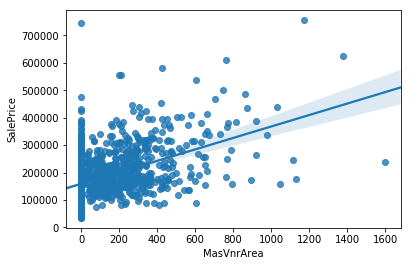

In [205]:
sns.regplot(x='MasVnrArea',y='SalePrice',data=df_train)

In [206]:
df_train[['MasVnrType','MasVnrArea','SalePrice']][df_train['MasVnrType'].isnull()]

,MasVnrType,MasVnrArea,SalePrice


In [207]:
df_train['MasVnrArea'].mean()

103.68526170798899

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


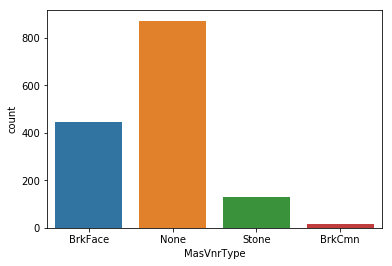

In [208]:
sns.countplot(x='MasVnrType',data=df_train)

In [209]:
df_train[['MasVnrType','MasVnrArea','SalePrice']][df_train['MasVnrArea'].isnull()]

,MasVnrType,MasVnrArea,SalePrice
234,None,NaN,216500
529,None,NaN,200624
650,None,NaN,205950
936,None,NaN,184900
973,None,NaN,182000
977,None,NaN,199900
1243,None,NaN,465000
1278,None,NaN,237000


In [210]:
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(0)

In [211]:
df_train[null_columns].isnull().sum().sort_values()

MasVnrType         0
MasVnrArea         0
Electrical         1
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [212]:
basement=df_train[['BsmtQual','BsmtExposure','BsmtCond','BsmtFinType1','BsmtFinType2']]
basement[basement['BsmtQual'].isnull()].head(40)

,BsmtQual,BsmtExposure,BsmtCond,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [213]:
df_train[['BsmtQual','BsmtExposure','BsmtCond','BsmtFinType1','BsmtFinType2']]=df_train[['BsmtQual','BsmtExposure','BsmtCond','BsmtFinType1','BsmtFinType2']].fillna('None')

In [214]:
df_train[null_columns].isnull().sum().sort_values()

MasVnrType         0
MasVnrArea         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Electrical         1
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


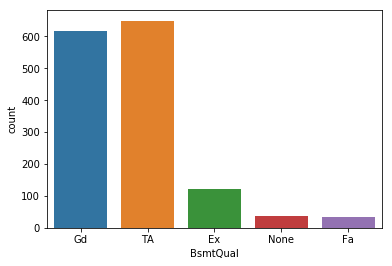

In [215]:
sns.countplot(x='BsmtQual',data=df_train)

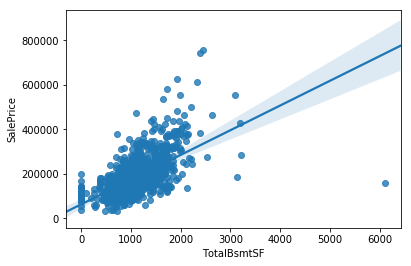

In [216]:
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=df_train)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


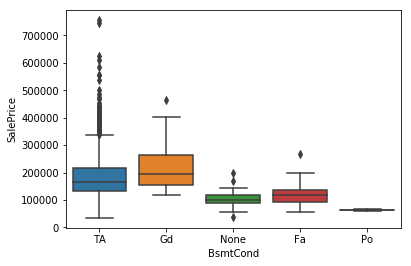

In [217]:
sns.boxplot(x='BsmtCond',y='SalePrice',data=df_train)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


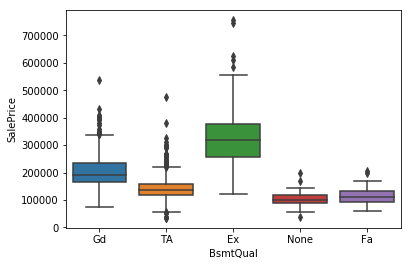

In [218]:
sns.boxplot(x='BsmtQual',y='SalePrice',data=df_train)

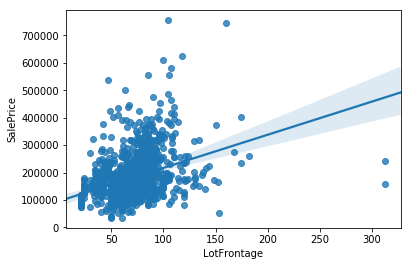

In [219]:
sns.regplot(x='LotFrontage',y='SalePrice',data=df_train)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


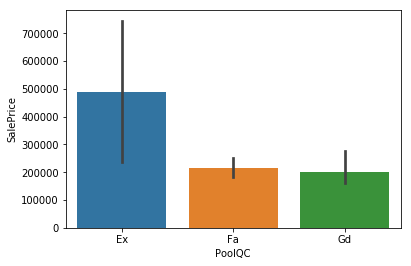

In [220]:
sns.barplot(x='PoolQC',y='SalePrice',data=df_train)


In [221]:
df_train['PoolQC']=df_train['PoolQC'].fillna('None')

In [222]:
df_train['Fence']=df_train['Fence'].fillna('None')

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


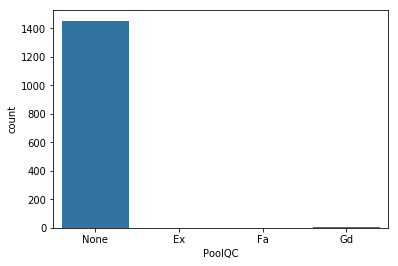

In [223]:
sns.countplot(x='PoolQC',data=df_train)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


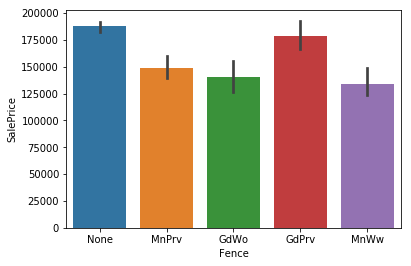

In [224]:
sns.barplot(x='Fence',y='SalePrice',data=df_train)

In [225]:
df_train[null_columns].isnull().sum().sort_values()

PoolQC             0
MasVnrType         0
MasVnrArea         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Fence              0
Electrical         1
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
LotFrontage      259
FireplaceQu      690
Alley           1369
MiscFeature     1406
dtype: int64

In [226]:
modeE=df_train['Electrical'].mode()
modeE

0    SBrkr
dtype: object

In [227]:
df_train[['GarageCond','SalePrice']][df_train['GarageCond'].isnull()].head()

,GarageCond,SalePrice
39,NaN,82000
48,NaN,113000
78,NaN,136500
88,NaN,85000
89,NaN,123600


In [228]:
import numpy as np

In [229]:
df_train['Electrical'].fillna(modeE[0],inplace=True)

In [230]:
Garage=['GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual']

In [231]:
df_train[['GarageCond','GarageType','GarageYrBlt','GarageFinish','SalePrice']][df_train['GarageType'].isnull()].head()

,GarageCond,GarageType,GarageYrBlt,GarageFinish,SalePrice
39,NaN,NaN,NaN,NaN,82000
48,NaN,NaN,NaN,NaN,113000
78,NaN,NaN,NaN,NaN,136500
88,NaN,NaN,NaN,NaN,85000
89,NaN,NaN,NaN,NaN,123600


In [232]:
df_train['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [233]:
df_train['FireplaceQu'].value_counts(normalize=True)

Gd    0.493506
TA    0.406494
Fa    0.042857
Ex    0.031169
Po    0.025974
Name: FireplaceQu, dtype: float64

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


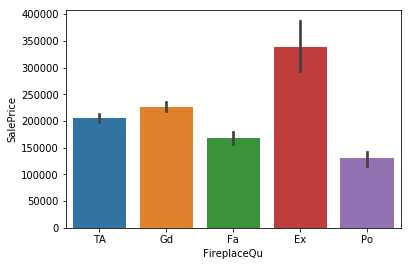

In [234]:
sns.barplot(x='FireplaceQu',y='SalePrice',data=df_train)

In [235]:
df_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [236]:
df_train[df_train[Garage].isnull()].head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
garnull=df_train[['GarageType','GarageYrBlt']].isnull()

In [238]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,None,None,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,None,None,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,None,None,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,None,None,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,None,None,NaN,0,12,2008,WD,Normal,250000


/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


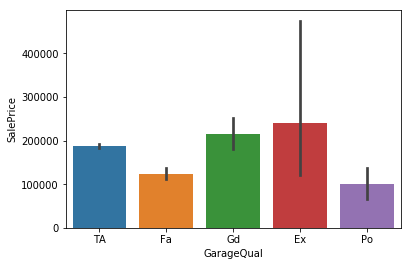

In [239]:
sns.barplot(x='GarageQual',y='SalePrice',data=df_train)

In [240]:
df_train[null_columns].isnull().sum().sort_values()

Electrical         0
PoolQC             0
MasVnrType         0
MasVnrArea         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Fence              0
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
LotFrontage      259
FireplaceQu      690
Alley           1369
MiscFeature     1406
dtype: int64

In [241]:
df_train[Garage].dtypes

GarageCond       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
dtype: object

In [242]:
df_train[['GarageCond','GarageType','GarageFinish','GarageQual']]=df_train[['GarageCond','GarageType','GarageFinish','GarageQual']].fillna('None')

In [243]:
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(0)

In [244]:
df_train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


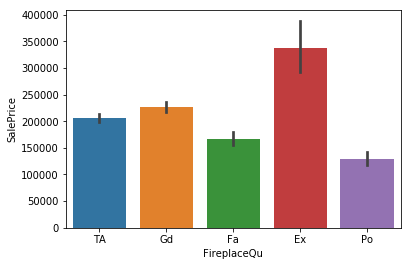

In [245]:
sns.barplot(x='FireplaceQu',y='SalePrice',data=df_train)

In [246]:
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna('None')

In [247]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(0)

In [248]:
df_train.drop(['Alley','MiscFeature'],axis=1,inplace=True)

In [249]:
# Using SelectKBest to select the list of import features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kbest=SelectKBest(score_func=chi2,k=3)

In [250]:
SP=df_train.SalePrice
SP.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [251]:
# X and Y values are defined and data is first fitted with the values and then the X value is transfomed with the KBest selected values

# It only works with numerical data

# it assigns  a score value and based on it the KBest features are selected




In [252]:
fit=kbest.fit(df_train[['OverallQual','GrLivArea','GarageArea','GarageCars','TotalBsmtSF','YearBuilt']],SP)

print(fit.scores_)

[    378.1  196850.1   96184.1     324.6  174706.5     443.9]


In [253]:
features=fit.transform(df_train[['OverallQual','GrLivArea','GarageArea','GarageCars','TotalBsmtSF','YearBuilt']])

In [254]:
print(features)

[[1710  548  856]
 [1262  460 1262]
 [1786  608  920]
 ..., 
 [2340  252 1152]
 [1078  240 1078]
 [1256  276 1256]]


In [255]:
# Let us try SelectKBest with all the numerical columns in the dataset
X=df_train.select_dtypes(include=['float64','int64'])

In [256]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [257]:
X.drop('SalePrice',axis=1,inplace=True)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [258]:
X.shape

(1460, 37)

In [259]:
import numpy
fit=kbest.fit(X,SP)
numpy.set_printoptions(precision=1)
print(fit.scores_)

[  1.5e+05   1.9e+04   1.4e+04   1.0e+07   3.8e+02   1.5e+02   4.4e+02
   1.9e+02   2.9e+05   4.0e+05   3.7e+05   2.7e+05   1.7e+05   1.2e+05
   4.6e+05   2.4e+05   2.0e+05   4.5e+02   6.0e+02   2.0e+02   5.2e+02
   1.7e+02   2.8e+01   3.6e+02   5.7e+02   8.3e+04   3.2e+02   9.6e+04
   1.3e+05   7.4e+04   9.9e+04   1.5e+05   1.4e+05   3.8e+05   6.3e+06
   7.4e+02   6.0e-01]


In [260]:
features=fit.transform(X)

print (features)

[[  8450.    854.      0.]
 [  9600.      0.      0.]
 [ 11250.    866.      0.]
 ..., 
 [  9042.   1152.   2500.]
 [  9717.      0.      0.]
 [  9937.      0.      0.]]


In [261]:
col=fit.get_support(indices=True)

selectedcol=X.columns[col]

selectedcol

Index(['LotArea', '2ndFlrSF', 'MiscVal'], dtype='object')

In [73]:
# Using Recursive Feature Elimination to choose the best features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

rfe=RFE(model,5)

rfe_fit=rfe.fit(X,SP)

rfe_fit.ranking_

array([27, 12, 15, 33,  1,  1, 10,  8, 17, 19, 23, 22, 28, 21, 25, 31, 26,
        1,  7,  3,  2,  4, 11,  1,  1, 13,  5, 20, 18, 14, 16, 29, 24, 30,
       32,  6,  9])

In [74]:
rfe_fit.n_features_


5

In [75]:
rfe_fit.support_

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [76]:
X.columns[rfe_fit.support_]

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'TotRmsAbvGrd',
       'Fireplaces'],
      dtype='object')

In [73]:
# Using Recursive Feature Elimination to choose the best features

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

rfecv=RFECV(model,step=1,cv=5)



In [78]:
rfecv_fit=rfecv.fit(X,SP)

rfecv_fit.ranking_

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([27, 12, 15, 33,  1,  1, 10,  8, 17, 19, 23, 22, 28, 21, 25, 31, 26,
        1,  7,  3,  2,  4, 11,  1,  1, 13,  5, 20, 18, 14, 16, 29, 24, 30,
       32,  6,  9])

In [79]:
X.shape

(1460, 37)

In [80]:
X.columns[rfecv_fit.support_]

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'TotRmsAbvGrd',
       'Fireplaces'],
      dtype='object')

In [262]:
from sklearn.preprocessing import StandardScaler

In [263]:
scale=StandardScaler()

In [264]:
scaled_x=scale.fit_transform(X)


In [84]:
rfecv_fit_scale=rfe.fit(scaled_x,SP)

In [85]:
X.columns[rfecv_fit_scale.support_]

Index(['OverallQual', '2ndFlrSF', 'FullBath', 'GarageCars', 'GarageArea'], dtype='object')

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

In [77]:
Tree=ExtraTreesClassifier()

In [88]:
Tree.fit(scaled_x,SP)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [89]:
numpy.set_printoptions(precision=5)
print(Tree.feature_importances_)

[ 0.04603  0.02187  0.04069  0.04393  0.03034  0.02698  0.04022  0.04184
  0.03234  0.03775  0.01214  0.04684  0.04617  0.04622  0.02213  0.00229
  0.04436  0.01737  0.00743  0.01099  0.01158  0.02447  0.00339  0.03285
  0.02389  0.04131  0.01874  0.04271  0.03401  0.035    0.01386  0.00301
  0.00998  0.00056  0.00473  0.04223  0.03974]


In [95]:
# using Stability Selection methods for feature selection using Randamized Lasso
from sklearn.linear_model import RandomizedLasso

rlasso=RandomizedLasso()
rlasso.fit(scaled_x,SP)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedLasso(alpha='aic', eps=2.2204460492503131e-16, fit_intercept=True,
        max_iter=500, memory=None, n_jobs=1, n_resampling=200,
        normalize=True, pre_dispatch='3*n_jobs', precompute='auto',
        random_state=None, sample_fraction=0.75, scaling=0.5,
        selection_threshold=0.25, verbose=False)

In [96]:
rlasso.scores_


array([ 0.085,  1.   ,  0.225,  0.98 ,  1.   ,  0.94 ,  1.   ,  0.995,
        0.995,  0.985,  0.055,  0.115,  0.815,  0.62 ,  0.12 ,  0.255,
        0.905,  0.89 ,  0.06 ,  0.475,  0.07 ,  0.875,  0.915,  0.63 ,
        0.965,  0.835,  0.915,  0.59 ,  0.99 ,  0.18 ,  0.115,  0.1  ,
        0.875,  0.46 ,  0.   ,  0.04 ,  0.125])

In [164]:
colnames=X.columns

In [265]:
df_train_dummies=pd.get_dummies(df_train)

In [266]:
df_train.shape

(1460, 79)

In [267]:
df_train_dummies.shape

(1460, 296)

In [268]:
obj=df_train.select_dtypes(['object']).columns
obj

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [269]:
df_train.shape

(1460, 79)

In [270]:
df_train.drop(obj,axis=1,inplace=True)

In [271]:
df_train=pd.concat([df_train,df_train_dummies],axis=1)

In [272]:
df_train.shape

(1460, 334)

In [273]:
scaled_df=scale.fit_transform(df_train)

In [313]:
# applying pca to the scaled data

from sklearn.decomposition import PCA

pca=PCA(n_components=180)

In [314]:
fit1 = pca.fit(scaled_df)
# summarize components

print(fit1.components_)

[[-0.  -0.   0.  ..., -0.  -0.   0.1]
 [-0.   0.1  0.  ..., -0.  -0.   0.1]
 [ 0.  -0.1  0.1 ...,  0.   0.  -0. ]
 ..., 
 [-0.  -0.  -0.  ..., -0.   0.   0. ]
 [ 0.  -0.  -0.  ..., -0.   0.1  0. ]
 [-0.   0.   0.  ..., -0.  -0.   0. ]]


In [315]:
print(fit1.explained_variance_ratio_)

[ 0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]


In [316]:
import matplotlib.pyplot as plt

var1=np.cumsum(np.round(fit1.explained_variance_ratio_, decimals=4)*100)

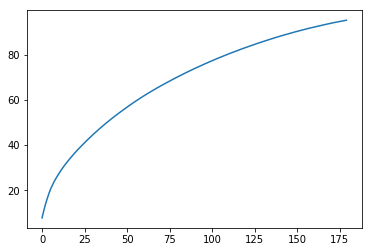

In [317]:
plt.plot(var1)

In [318]:
pca_trans=pca.fit_transform(scaled_df)

In [319]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [323]:
pca_trans

array([[  4.0e+00,   1.7e+00,  -2.9e+00, ...,  -4.9e-03,  -1.6e-01,
          2.5e-01],
       [  2.6e-01,  -3.7e+00,   5.6e-01, ...,  -4.0e-02,   4.3e-01,
          1.1e+00],
       [  5.0e+00,   1.2e+00,  -2.2e+00, ...,   3.4e-02,   2.2e-01,
          2.8e-01],
       ..., 
       [  2.0e+00,   2.9e+00,   3.7e+00, ...,  -1.4e+00,   6.3e-01,
         -4.6e-01],
       [ -3.7e+00,  -5.2e+00,  -2.8e-02, ...,  -2.9e-01,   1.1e+00,
          2.2e-01],
       [ -1.5e+00,  -4.4e+00,   2.1e-01, ...,   9.7e-01,  -1.2e+00,
          1.4e-02]])

In [356]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(pca_trans, SP, test_size = 0.3)

In [357]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



In [358]:
svr_fit = SVR()
svr_fit.fit(x_train,y_train)
svr_pred=svr_fit.predict(x_val)

score_svr=svr_fit.score(x_train,y_train)

score_svr

-0.051649509056427068

In [359]:
mean_error= mean_absolute_error(y_val,svr_pred)

mean_error

55697.336531873203

In [360]:
Lr_fit = LinearRegression()
Lr_fit.fit(x_train,y_train)
Lr_pred=Lr_fit.predict(x_val)

score_Lr=Lr_fit.score(x_train,y_train)


score_Lr


0.9561728197599616

In [361]:
mean_error= mean_absolute_error(y_val,Lr_pred)
mean_error

20661.866663043307

In [362]:
from xgboost import XGBRegressor


/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [363]:

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(x_train,y_train, verbose=False)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [364]:
predictions = my_model.predict(x_val)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions,y_val)))

Mean Absolute Error : 15494.6918522


In [365]:
from sklearn.ensemble import AdaBoostClassifier

In [369]:
ada=AdaBoostClassifier(n_estimators=500, random_state=7)
ada_fit=ada.fit(x_train,y_train)


AttributeError: 'AdaBoostClassifier' object has no attribute 'mean'

In [370]:
ada_pred=ada_fit.predict(x_val)

In [374]:
print("Mean Absolute Error : " + str(mean_absolute_error(y_val,ada_pred)))

Mean Absolute Error : 43020.2054795
